<a href="https://colab.research.google.com/github/Rafi653/FDA/blob/feature%2Flab2/3_Permutation_Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np


def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


Permutation Entropy Cancels= 0.937550625656298
Complexity Cancels= 0.0555136269980162


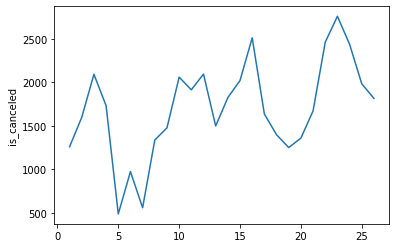

In [ ]:
import pandas as pd
from datetime import datetime
import seaborn as sns

hotel_df = pd.read_csv('hotel_bookings.csv')
for i in range(len(hotel_df)):
  hotel_df.loc[i, 'arrival_date_month'] = datetime.strptime(hotel_df.loc[i, 'arrival_date_month'], "%B").month

hotel_df1 = hotel_df[["arrival_date_year", "arrival_date_month", "is_canceled"]]
hotel_df2 =  hotel_df1[hotel_df1["is_canceled"] == 1].groupby(["arrival_date_year", "arrival_date_month"]).agg({'is_canceled': 'sum'})
 
sns.lineplot(x=range(1, len(hotel_df2['is_canceled'])+1), y=hotel_df2['is_canceled'])

op_cancles = ordinal_patterns(hotel_df2['is_canceled'],3,1)
print("Permutation Entropy Cancels=", p_entropy(op_cancles))
print("Complexity Cancels=", complexity(op_cancles))

In [ ]:
import pandas as pd
hotel_df = pd.read_csv('hotel_bookings.csv')

In [ ]:

for i in range(len(hotel_df)):
  hotel_df.loc[i, 'arrival_date_month'] = datetime.strptime(hotel_df.loc[i, 'arrival_date_month'], "%B").month

hotel_df['arrival_date_month']

#datetime.strptime(hotel_df['arrival_date_month'], "%B")

#hotel_df.length


0         7
1         7
2         7
3         7
4         7
         ..
119385    8
119386    8
119387    8
119388    8
119389    8
Name: arrival_date_month, Length: 119390, dtype: object

In [ ]:
hotel_df['arrival_date_month']

0           July
1           July
2           July
3           July
4           July
           ...  
119385    August
119386    August
119387    August
119388    August
119389    August
Name: arrival_date_month, Length: 119390, dtype: object

In [ ]:
hotel_df1 = hotel_df[["arrival_date_year", "arrival_date_month", "is_canceled"]]
hotel_df1

,arrival_date_year,arrival_date_month,is_canceled
0,2015,7,0
1,2015,7,0
2,2015,7,0
3,2015,7,0
4,2015,7,0
...,...,...,...
119385,2017,8,0
119386,2017,8,0
119387,2017,8,0
119388,2017,8,0


In [ ]:


hotel_df2 =  hotel_df1[hotel_df1["is_canceled"] == 1].groupby(["arrival_date_year", "arrival_date_month"]).agg({'is_canceled': 'sum'})
 
from datetime import datetime


#hotel_df2["arrival_date_month"] <- match(hotel_df2[,"arrival_date_month"],month.name)
display(hotel_df2)

is_canceled
arrival_date_year arrival_date_month             
2015              7                          1259
                  8                          1598
                  9                          2094
                  10                         1732
                  11                          486
                  12                          973
2016              1                           557
                  2                          1337
                  3                          1477
                  4                          2061
                  5                          1915
                  6                          2096
                  7                          1499
                  8                          1825
                  9                          2022
                  10                         2514
                  11                         1636
                  12                         1398
2017              1                          1250
                  2                          1359
                  3                          1672
                  4                          2463
                  5                          2762
                  6                          2439
                  7                          1984
                  8                          1816

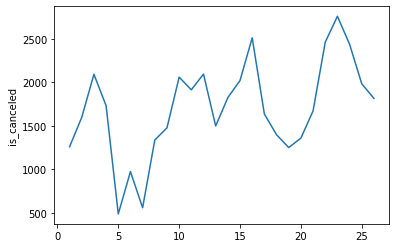

In [ ]:
import seaborn as sns
sns.lineplot(x=range(1, len(hotel_df2['is_canceled'])+1), y=hotel_df2['is_canceled'])

In [ ]:
op_walking = ordinal_patterns(hotel_df2['is_canceled'],3,1)
#op_standing = ordinal_patterns(standing['attr_x'][1000:1200],3,1)
print("Permutation Entropy Cancels=", p_entropy(op_walking))
print("Complexity Cancels=", complexity(op_walking))
#print("Permutation Entropy Standing=", p_entropy(op_standing))
#print("Complexity Standing=", complexity(op_standing))

Permutation Entropy Cancels= 0.937550625656298
Complexity Cancels= 0.0555136269980162
